In [28]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# Import matplotlib - the main python plotting package
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [11]:
df_ord = pd.read_csv("CAPE_Richard_Ord.csv")
df_cao = pd.read_csv("CAPE_Yingjun Cao.csv")
df_cheng = pd.read_csv("CAPE_Chung Kuan Cheng.csv")

In [21]:
#Check for missing data, none found
df_ord[df_ord.isnull().any(axis=1)]
df_cao[df_cao.isnull().any(axis=1)]
df_cheng[df_cheng.isnull().any(axis=1)]

,Unnamed: 0,LOCATION,ROOM,QUARTER_INDEX,QUARTER,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,SECTION_SIZE,RESPONSE_SIZE,RATING,Question_7,Question_9,Question_14,Question_15


In [60]:
df_ord.head()

,Unnamed: 0,LOCATION,ROOM,QUARTER_INDEX,QUARTER,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,SECTION_SIZE,RESPONSE_SIZE,RATING,Question_7,Question_9,Question_14,Question_15
0,8525,PCYNH,109,9,FA12,CSE,30,755935,Ord,Richard,169,97,4.845361,4.845361,4.391753,4.587629,4.742268
1,43231,PCYNH,109,11,FA13,CSE,30,785785,Ord,Richard,124,45,4.711111,4.711111,4.355556,4.511111,4.600000
2,43252,PCYNH,109,11,FA13,CSE,30,785788,Ord,Richard,183,53,4.698113,4.698113,4.346154,4.557692,4.603774
3,85321,PCYNH,109,46,FA14,CSE,30,817631,Ord,Richard,112,39,4.692308,4.692308,4.307692,4.589744,4.641026
4,85342,PCYNH,109,46,FA14,CSE,30,817634,Ord,Richard,135,38,4.500000,4.500000,4.135135,4.552632,4.394737


In [39]:
df_ord.LOCATION.unique()

array(['PCYNH', 'LEDDN', 'CENTR', 'WLH  ', 'CICC ', 'SOLIS', 'PETER'],
      dtype=object)

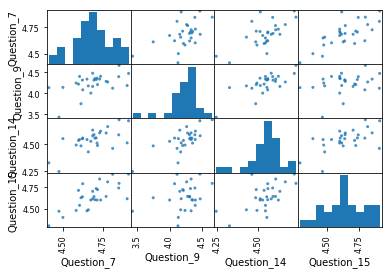

In [40]:
#correlations between questions, mostly positive correlations
params=['Question_7', 'Question_9', 'Question_14', 'Question_15' ]
fig = scatter_matrix(df_ord[params],alpha=0.8)

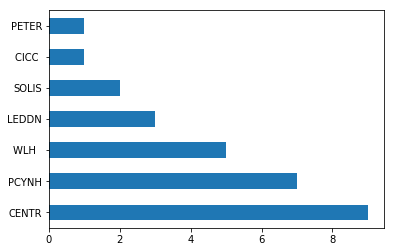

In [43]:
# Counts for each classroom
df_ord['LOCATION'].value_counts().plot(kind='barh')
f1 = plt.gcf()

4.702417149333333

In [49]:
#means of the different locations
df_ord.groupby('LOCATION').mean().reset_index()

,LOCATION,Unnamed: 0,QUARTER_INDEX,COURSE_NUM,SECTION,SECTION_SIZE,RESPONSE_SIZE,RATING,Question_7,Question_9,Question_14,Question_15
0,CENTR,690948.222222,51.000000,30.0,852034.777778,135.000000,45.333333,4.702417,4.702417,4.343079,4.570082,4.631685
1,CICC,601394.000000,81.000000,30.0,903674.000000,191.000000,52.000000,4.807692,4.807692,4.115385,4.461538,4.903846
2,LEDDN,479447.666667,34.333333,30.0,818662.666667,171.666667,58.000000,4.694156,4.694156,4.271784,4.516492,4.543437
3,PCYNH,249701.857143,40.428571,30.0,823176.571429,154.428571,55.714286,4.645542,4.645542,4.168115,4.511489,4.594833
4,PETER,940966.000000,89.000000,30.0,927460.000000,126.000000,55.000000,4.672727,4.672727,4.000000,4.527273,4.600000
5,SOLIS,911456.000000,84.500000,30.0,911001.500000,193.500000,68.500000,4.668464,4.668464,4.139652,4.522894,4.757672
6,WLH,753770.600000,68.400000,30.0,885118.000000,201.000000,67.000000,4.692644,4.692644,4.193133,4.583697,4.698637


In [62]:
#Another comparison with quarters
pv = df_ord.pivot_table(index=['LOCATION','QUARTER'])
pv

COURSE_NUM  QUARTER_INDEX  Question_14  Question_15  \
LOCATION QUARTER                                                        
CENTR    SP14             30             13     4.583041     4.536364   
         SP16             30             71     4.604651     4.642857   
         SP17             30             81     4.718750     4.906250   
         WI13             30              8     4.728814     4.796610   
         WI15             30             47     4.438906     4.466693   
         WI17             30             80     4.606061     4.848485   
         WI19             30             99     4.428571     4.484848   
CICC     SP17             30             81     4.461538     4.903846   
LEDDN    SP13             30              7     4.512821     4.615385   
         SP15             30             48     4.518327     4.507463   
PCYNH    FA12             30              9     4.587629     4.742268   
         FA13             30             11     4.534402     4.601887   
         FA14             30             46     4.571188     4.517881   
         SP18             30             90     4.245902     4.467742   
         WI16             30             70     4.535714     4.714286   
PETER    WI18             30             89     4.527273     4.600000   
SOLIS    WI17             30             80     4.488095     4.722892   
         WI18             30             89     4.557692     4.792453   
WLH      SP16             30             71     4.664286     4.814286   
         SP18             30             90     4.484848     4.626866   
         WI14             30             12     4.578947     4.614035   
         WI16             30             70     4.631579     4.702703   
         WI19             30             99     4.558824     4.735294   

                  Question_7  Question_9    RATING  RESPONSE_SIZE   SECTION  \
LOCATION QUARTER                                                              
CENTR    SP14       4.691228    4.366667  4.691228           51.0  809003.5   
         SP16       4.767442    4.279070  4.767442           43.0  867299.0   
         SP17       4.906250    4.468750  4.906250           32.0  903678.0   
         WI13       4.847458    4.661017  4.847458           59.0  766822.0   
         WI15       4.516867    4.220390  4.516867           52.0  828250.0   
         WI17       4.727273    4.333333  4.727273           33.0  894543.0   
         WI19       4.657143    4.171429  4.657143           35.0  961464.0   
CICC     SP17       4.807692    4.115385  4.807692           52.0  903674.0   
LEDDN    SP13       4.897436    4.179487  4.897436           39.0  777001.0   
         SP15       4.592515    4.317932  4.592515           67.5  839493.5   
PCYNH    FA12       4.845361    4.391753  4.845361           97.0  755935.0   
         FA13       4.704612    4.350855  4.704612           49.0  785786.5   
         FA14       4.596154    4.221414  4.596154           38.5  817632.5   
         SP18       4.475410    3.426230  4.475410           61.0  938548.0   
         WI16       4.596491    4.214286  4.596491           57.0  860915.0   
PETER    WI18       4.672727    4.000000  4.672727           55.0  927460.0   
SOLIS    WI17       4.714286    4.202381  4.714286           84.0  894541.0   
         WI18       4.622642    4.076923  4.622642           53.0  927462.0   
WLH      SP16       4.776978    4.264286  4.776978          139.0  867305.0   
         SP18       4.611940    3.746269  4.611940           67.0  938550.0   
         WI14       4.684211    4.473684  4.684211           57.0  797360.0   
         WI16       4.684211    4.157895  4.684211           38.0  860909.0   
         WI19       4.705882    4.323529  4.705882           34.0  961466.0   

                  SECTION_SIZE  Unnamed: 0  
LOCATION QUARTER                            
CENTR    SP14            153.0    465175.5  
         SP16             98.0    550453.0  
         SP17            103.0    60

In [58]:
outcome_1, predictors_1 = patsy.dmatrices('Question_15 ~ LOCATION + RESPONSE_SIZE', df_ord)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [59]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Question_15   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.076
Date:                Mon, 27 May 2019   Prob (F-statistic):              0.414
Time:                        18:52:15   Log-Likelihood:                 18.479
No. Observations:                  28   AIC:                            -20.96
Df Residuals:                      20   BIC:                            -10.30
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.5988      0.07